# Analysis Top 100 Spotify Tracks of 2018

At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. This year's playlist (Top Tracks of 2018) includes 100 songs. The question is: **`What do these top songs have in common? Why do people like them?`**

**`Original Data Source:`** The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

**`Data Description:`** There is one .csv file in the dataset. (top2018.csv) This file 

**`includes:`**

* Spotify URI for the song
* Name of the song
* Artist(s) of the song
* Audio features for the song (such as danceability, tempo, key etc.)
* A more detailed explanation of the audio features can be found in the Metadata tab.

**`Exploring the Data:`** Some suggestions for what to do with the data:

1. Look for patterns in the audio features of the songs. Why do people stream these songs the most?
2. Try to predict one audio feature based on the others
3. See which features correlate the most

**`NOTE:`** *At the end of this notebook you will be providing the conclusions of the study*

# import libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr
%matplotlib inline 

In [3]:
df=pd.read_csv('top2018.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [5]:
df.head()

id                          name       artists  \
0  6DCZcSspjsKoFjzjrWoCd                    God's Plan         Drake   
1  3ee8Jmje8o58CHK66QrVC                          SAD!  XXXTENTACION   
2  0e7ipj03S05BNilyu5bRz    rockstar (feat. 21 Savage)   Post Malone   
3  3swc6WTsr7rl9DqQKQA55  Psycho (feat. Ty Dolla $ign)   Post Malone   
4  2G7V7zsVDxg1yRsu7Ew9R                In My Feelings         Drake   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.754   0.449  7.0    -9.211   1.0       0.1090        0.0332   
1         0.740   0.613  8.0    -4.880   1.0       0.1450        0.2580   
2         0.587   0.535  5.0    -6.090   0.0       0.0898        0.1170   
3         0.739   0.559  8.0    -8.011   1.0       0.1170        0.5800   
4         0.835   0.626  1.0    -5.833   1.0       0.1250        0.0589   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000083     0.552    0.357   77.169     198973.0             4.0  
1          0.003720     0.123    0.473   75.023     166606.0             4.0  
2          0.000066     0.131    0.140  159.847     218147.0             4.0  
3          0.000000     0.112    0.439  140.124     221440.0             4.0  
4          0.000060     0.396    0.350   91.030     217925.0             4.0

**We make the conversion of the column duration  to place it in standard format (minutes:seg )**

Make the duration_min into duration_ms by deviding the column "duration_min" with 60 000

In [6]:
df['Duration_min']=df['duration_ms']/60000

In [7]:
df.drop(columns='duration_ms',inplace=True)

# Identification of correlations between columns.

In this step we will help you with the `corr ()` function of pandas and then we will make a heat map that will clearly show the correlations between certain columns, although the ideal thing before this step is to have an idea of ​​the columns that will have a possible correlation.

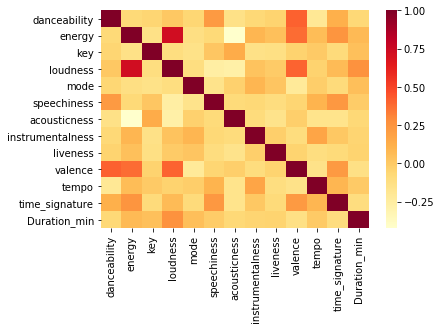

In [8]:
sns.heatmap(df.corr(),cmap="YlOrRd")

**ANALYSIS:** We can observe in the strongest tones the existing correlations between the different columns, at first glance the `"loudness and energy"` columns call our attention but our duty is to explore the behavior of each one of the variables.

# Top 10 artists with the largest presence in the Top 100

List all the number of times an artist is shown in the database 

In [9]:
df['artists'].value_counts().head(10)

XXXTENTACION     6
Post Malone      6
Drake            4
Marshmello       3
Ed Sheeran       3
Dua Lipa         2
Clean Bandit     2
Selena Gomez     2
Migos            2
Calvin Harris    2
Name: artists, dtype: int64

# Danceablity column analysis

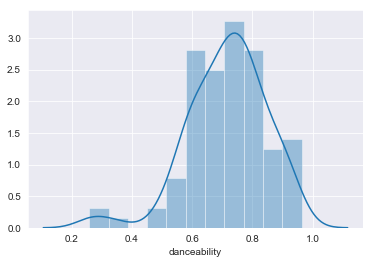

In [10]:
sns.set_style(style='darkgrid')
sns.distplot(df['danceability'],hist=True,kde=True)

**ANALYSIS:** In this graph we can see that most of the tracks are considered danceable from values ​​higher than 0.5, but to make a better analysis we are going to divide them into 3 groups:

* Greater than 75% --- Very danceable
* between 50% and 74% - Regularly danceable
* Minor 50% - non-danceable or instrumental music

In [11]:
# Set conditions
Vd=df['danceability']>=0.75
Ld=(df['danceability']>=0.5) & (df['danceability']<0.75)
Nd=df['danceability']<0.5

In [ ]:
# Create DataFrame 

In [12]:
data=[Vd.sum(),Ld.sum(),Nd.sum()]
Dance=pd.DataFrame(data,columns=['percent'],
                   index=['Very','Regular','Instrumental'])

In [13]:
Dance

percent
Very               43
Regular            53
Instrumental        4

# Energy tracks

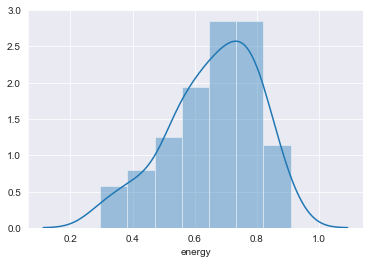

In [14]:
sns.distplot(df['energy'])

In [15]:
# Set conditions
Ve=df['energy']>=0.75
Re=(df['energy']>=0.5) & (df['energy']<0.75)
Le=df['energy']<0.5

In [16]:
#Create DataFrame
data=[Ve.sum(),Re.sum(),Le.sum()]
Energy=pd.DataFrame(data,columns=['percent'],
                   index=['Very Energy','Regular Energy','Low Energy'])

In [17]:
Energy

percent
Very Energy          32
Regular Energy       55
Low Energy           13

# Correlation  Zone 

In this area we will take into account the most important variables according to the preliminary analysis of the heat maps previously seen


In [18]:
Correlation=df[['danceability','energy','valence','loudness','tempo']]

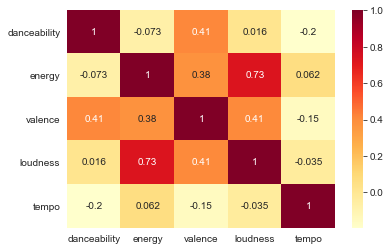

In [19]:
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")

In [2]:
sns.jointplot(data=Correlation,y='energy',x='loudness',kind='reg',stat_func=pearsonr)

NameError: name 'sns' is not defined

**ANALYSIS:** We can clearly observe that as the values ​​of loudness are closer to zero the probability that our song has a high content of rhythms is higher, in general these values ​​should be kept below zero but not very far away

# What is the musical tempo?
At first the musical scores did not give us indications about the tempo or they were very scarce, so each interpreter performed it at ease, but the idea of ​​the tempo begins to change from the eighteenth and nineteenth century, possibly as a consequence of the fact that composers will be tired of listening to interpretations of their works with completely arbitrary times. Then came a notation that expressed the "speed" or form that the works should be executed.

The 5 most usual ones were:

* Length: very slow (20 bpm)
* Adagio: slow and majestic (66 to 76 bpm)
* Andante: at the pace, quiet, a little vivacious (76 to 108 bpm)
* Allegro: animated and fast. (110 to 168 bpm).
* Presto: very fast (168 to 200 bpm).

In [21]:
df['Rhythm']=df['tempo']

In [22]:
df.loc[df['tempo']>168,'Rhythm']='Presto'
df.loc[(df['tempo']>=110) & (df['tempo']<=168),'Rhythm']='Allegro'
df.loc[(df['tempo']>=76) & (df['tempo']<=108),'Rhythm']='Andante'
df.loc[(df['tempo']>=66) & (df['tempo']<=76),'Rhythm']='Adagio'
df.loc[df['tempo']<65,'Rhythm']='Length'


# Classification according to the tempo of the track

In [23]:
df['Rhythm'].value_counts()

Allegro    47
Andante    44
Presto      7
Length      1
Adagio      1
Name: Rhythm, dtype: int64

Text(0.5, 1.0, 'Popular keys')

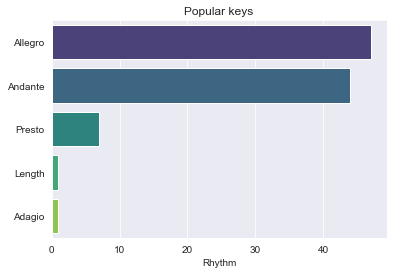

In [24]:
sns.set_style(style='darkgrid')
Rhy=df['Rhythm'].value_counts()
Rhy_DF=pd.DataFrame(Rhy)
sns.barplot(x=Rhy_DF.Rhythm, y=Rhy_DF.index, palette="viridis")
plt.title('Popular keys')

**NOTE:** As we can see these songs are influenced by the intermediate rhythms offered by the following genres:
 * ***Hip hop***
 * ***reggaeton***
 * ***Pop***
 * ***Rap***
        

# Top 10 of the most danceable songs

In [25]:
df[['name','artists','danceability','valence','tempo','Rhythm']].sort_values(by='danceability',ascending=False).head(10)

name         artists  danceability  \
91                              Yes Indeed        Lil Baby         0.964   
55  FEFE (feat. Nicki Minaj & Murda Beatz)         6ix9ine         0.931   
19                Look Alive (feat. Drake)      BlocBoy JB         0.922   
18                               Moonlight    XXXTENTACION         0.921   
61                                 Nonstop           Drake         0.912   
89                                   Bella         Wolfine         0.909   
73                         Walk It Talk It           Migos         0.909   
82                                 HUMBLE.  Kendrick Lamar         0.908   
21                         Te Bot? - Remix      Nio Garcia         0.903   
30                    Taste (feat. Offset)            Tyga         0.884   

    valence    tempo   Rhythm  
91    0.562  119.958  Allegro  
55    0.376  125.978  Allegro  
19    0.595  140.022  Allegro  
18    0.711  128.009  Allegro  
61    0.422  154.983  Allegro  
89    0.844   94.016  Andante  
73    0.406  145.905  Allegro  
82    0.421  150.011  Allegro  
21    0.442   96.507  Andante  
30    0.342   97.994  Andante

# Top 10 songs with the most energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [26]:
df[['name','artists','energy','valence','tempo','Rhythm']].sort_values(by='energy',ascending=False).head(10)

name              artists  energy  \
12                                Nice For What                Drake   0.909   
77  1, 2, 3 (feat. Jason Derulo & De La Ghetto)          Sofia Reyes   0.895   
34                              ?chame La Culpa           Luis Fonsi   0.889   
9                                       FRIENDS           Marshmello   0.880   
7                      One Kiss (with Dua Lipa)        Calvin Harris   0.862   
46              Finesse (Remix) [feat. Cardi B]           Bruno Mars   0.859   
23                                   Youngblood  5 Seconds of Summer   0.854   
41                                         Dura         Daddy Yankee   0.848   
45                                  Jackie Chan               Ti?sto   0.834   
43                                      Thunder      Imagine Dragons   0.822   

    valence    tempo   Rhythm  
12    0.757   93.394  Andante  
77    0.794   94.968  Andante  
34    0.649   96.024  Andante  
9     0.534   95.079  Andante  
7     0.592  123.994  Allegro  
46    0.926  105.115  Andante  
23    0.152  120.274  Allegro  
41    0.828   95.000  Andante  
45    0.687  128.005  Allegro  
43    0.288  167.997  Allegro

# Top 10 songs more likely to create positive feelings

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [27]:
df[['name','artists','energy','valence','tempo','Rhythm']].sort_values(by='valence',ascending=False).head(10)

name        artists  energy  \
25                                 Shape of You     Ed Sheeran   0.652   
46              Finesse (Remix) [feat. Cardi B]     Bruno Mars   0.859   
89                                        Bella        Wolfine   0.493   
66      D?jala que vuelva (feat. Manuel Turizo)        Piso 21   0.788   
78                                     Criminal  Natti Natasha   0.813   
41                                         Dura   Daddy Yankee   0.848   
59                                   Sin Pijama        Becky G   0.745   
77  1, 2, 3 (feat. Jason Derulo & De La Ghetto)    Sofia Reyes   0.895   
44                                     Me Niego           Reik   0.779   
12                                Nice For What          Drake   0.909   

    valence    tempo   Rhythm  
25    0.931   95.977  Andante  
46    0.926  105.115  Andante  
89    0.844   94.016  Andante  
66    0.839  170.019   Presto  
78    0.839   79.997  Andante  
41    0.828   95.000  Andante  
59    0.820   94.014  Andante  
77    0.794   94.968  Andante  
44    0.768   94.023  Andante  
12    0.757   93.394  Andante

# Analysis of artists with greater presence in the 100 most played songs of 2018

We are going to analyze the 4 artists with more songs within the Top 100 to see taste patterns among the clients

In [28]:
df['artists'].value_counts().head(4)

XXXTENTACION    6
Post Malone     6
Drake           4
Marshmello      3
Name: artists, dtype: int64

# Artista XXXTENTATION

In [29]:
XXXTENT=df[df['artists']=='XXXTENTACION']

In [30]:
XXXTENT[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

name  danceability  energy  loudness  \
1                                 SAD!         0.740   0.613    -4.880   
18                           Moonlight         0.921   0.537    -5.723   
28                      Jocelyn Flores         0.872   0.391    -9.144   
38                             changes         0.669   0.308   -10.068   
62      Fuck Love (feat. Trippie Redd)         0.797   0.533    -9.740   
94  Everybody Dies In Their Nightmares         0.734   0.570    -7.066   

    valence    tempo   Rhythm  
1     0.473   75.023   Adagio  
18    0.711  128.009  Allegro  
28    0.437  134.021  Allegro  
38    0.520   64.934   Length  
62    0.329  131.036  Allegro  
94    0.689  129.953  Allegro

**NOTE:** Although according to the data presented the artist is characterized by having more danceable tracks one could say that his influence in this ranking is due to the Hip Hop genre due to the speed belongs to the rhythm "ALLEGRO".

# Artista Post Malone

In [31]:
PMalone=df[df['artists']=='Post Malone']

In [32]:
PMalone[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

name  danceability  energy  loudness  valence  \
2     rockstar (feat. 21 Savage)         0.587   0.535    -6.090    0.140   
3   Psycho (feat. Ty Dolla $ign)         0.739   0.559    -8.011    0.439   
5                     Better Now         0.680   0.563    -5.843    0.374   
32                  I Fall Apart         0.556   0.538    -5.408    0.291   
75                   Candy Paint         0.670   0.654    -5.944    0.438   
76               Congratulations         0.630   0.804    -4.183    0.492   

      tempo   Rhythm  
2   159.847  Allegro  
3   140.124  Allegro  
5   145.028  Allegro  
32  143.950  Allegro  
75  180.024   Presto  
76  123.146  Allegro

**NOTE:** In the case of this artist we can observe the same tendency with respect to the rhythm "ALLEGRO".

# Artista Drake

In [ ]:
Drake=df[df['artists']=='Drake']

In [ ]:
Drake[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

# Artista Ed Sheran 

In [33]:
Edshe=df[df['artists']=='Ed Sheeran']
Edshe[['name','danceability','energy','loudness','valence','acousticness','tempo','Rhythm']]

name  danceability  energy  loudness  \
25                         Shape of You         0.825   0.652    -3.183   
29                              Perfect         0.599   0.448    -6.312   
84  Perfect Duet (Ed Sheeran & Beyonc?)         0.587   0.299    -7.365   

    valence  acousticness   tempo   Rhythm  
25    0.931         0.581  95.977  Andante  
29    0.168         0.163  95.050  Andante  
84    0.356         0.779  94.992  Andante


# Data treatment  regarding the 'MODE' column

We will analyze the data in such a way that we consider values ​​higher than 0.5 in the danceability and energy columns because most of the data are concentrated in these ranges and we do not want values ​​lower than 0.5, affecting a possible correlation between columns.

**Mode Column**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [34]:
Mayores=df[df['mode']==1]
Menores=df[df['mode']==0]

In [ ]:
# Variables separation according to the scale to which Major or minor belongs

In [35]:
MayoresD=Mayores[Mayores['danceability']>=0.5]
MenoresD=Menores[Menores['danceability']>=0.5]

In [ ]:
# We eliminate the columns that say nothing in the study

In [36]:
MayoresD=Mayores.drop(columns=['mode','time_signature'])
MenoresD=Menores.drop(columns=['mode','time_signature'])

In [ ]:
# Heat map for Major scales

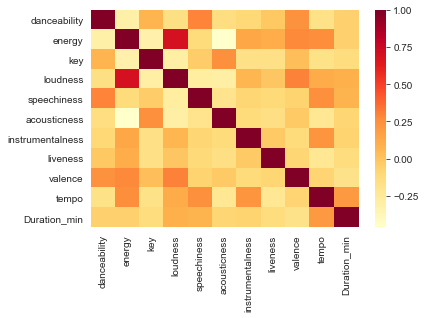

In [37]:
sns.heatmap(MayoresD.corr(),cmap="YlOrRd")

In [ ]:
# Heat map for Less scales

In [ ]:
sns.heatmap(MenoresD.corr(),cmap="YlOrRd")

In [ ]:
# We create the variables and assign the columns that we want to correlate

In [ ]:
MaycorD=MayoresD[['danceability','energy','valence','loudness','tempo']]
MencorD=MenoresD[['danceability','energy','valence','loudness','tempo']]

In [ ]:
# Major scale correlation

In [ ]:
sns.heatmap(MaycorD.corr(),annot=True,cmap="YlOrRd")

In [ ]:
sns.heatmap(MencorD.corr(),annot=True,cmap="YlOrRd")


**ANALYSIS:** As we can observe the tracks with minor scales show us correlation better between the most important variables


# Keys
keyThe key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

In [ ]:
df.loc[ df['key']==0 ,'key']='C'    
df.loc[ df['key']==1 ,'key']='C#'    
df.loc[ df['key']==2 ,'key']='D'    
df.loc[ df['key']==3 ,'key']='D#'    
df.loc[ df['key']==4 ,'key']='E'    
df.loc[ df['key']==5 ,'key']='F'    
df.loc[ df['key']==6 ,'key']='F#'    
df.loc[ df['key']==7 ,'key']='G'    
df.loc[ df['key']==8 ,'key']='G#'    
df.loc[ df['key']==9 ,'key']='A'    
df.loc[ df['key']==10 ,'key']='A#' 
df.loc[ df['key']==11 ,'key']='B' 

In [ ]:
sns.set_style(style='darkgrid')
keys=df['key'].value_counts()
key_DF=pd.DataFrame(keys)
sns.barplot(x=key_DF.key, y=key_DF.index, palette="viridis")
plt.title('Popular keys')

# Parameter relationship by key

As we can see the most danceable tracks go by the key "G and C #" and those that have more energy have "F #, C # and D" 

In [ ]:
df[['danceability','energy','valence','key']].groupby(by='key').mean().sort_values(by='danceability',ascending=False)

# Conclusions:

To answer the 2 initial questions posed by this data set, we can say that there was only a correlation between energy and noise, on the other hand, you can see that the main reason for people to like these songs is In relation to the time of the track, let's say that most of the tracks were within the range ***"ALLEGRO"*** and ***"ANDANTE"*** that are characteristic of the genres:

* ***Hip hop***
* ***reggaeton***
* ***Pop***
* ***Rap***



**FINAL!!!!**